# Sentiment Analysis on Twitter Data: Lexicon Method

Steps that we will take in order to make a Sentiment Analysis:
1. Import Dependencies and Tools needed for Analysis.
2. Run Mock example on three made up Tweets involving me.
3. Create a key to be able to use Twitter Data.
4. Pull Data from Twitter and Create a distribution of the polarity scores.
5. Conclusion and Shortcomings

## Step 1: Importing Dependencies

In [3]:
#Importing libraries and Dependencies
import tweepy
from textblob import TextBlob
import nltk
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Single String tweet
tweet1=TextBlob("I think Federico is a cool guy")
tweet2=TextBlob('I semi love Federico')
tweet3=TextBlob("I really adore Federico")

## Step 2: Mock Trial Run using our Three Tweets above

In [13]:
#Test run with a single string
Ts1=tweet1.sentiment.polarity
Ts2=tweet2.sentiment.polarity
Ts3=tweet3.sentiment.polarity
tweet_Scores=[Ts1,Ts2,Ts3]
for tweets in tweet_Scores:
    if tweets<0:
        print('The score for this is: '+ str(tweets) +' which means this is a negative comment')
    elif tweets>0:
        print('The score for this is: '+ str(tweets) + ' which means this is a positive comment :)')
    else:
        print('There is neither a positive or a negative opinion')
        

np_tweet_scores=np.asarray(tweet_Scores)
print(np.mean(np_tweet_scores))
if np.mean(np_tweet_scores) < 0:
    print('The mean score for this is: '+ str(np.mean(np_tweet_scores)) +' which means this is a negative sentiment')
elif tweets>0:
    print('The mean score for this is: '+ str(np.mean(np_tweet_scores)) + ' which means this is a positive sentiment :)')
else:
    print('There mean is neither a positive or a negative sentiment')

The score for this is: 0.35 which means this is a positive comment :)
The score for this is: 0.5 which means this is a positive comment :)
The score for this is: 0.2 which means this is a positive comment :)
0.35000000000000003
The mean score for this is: 0.35000000000000003 which means this is a positive sentiment :)


## Step 3: Access Twitter Data

In [6]:
#Creating variables to authenticate our Twitter Access to gather our data

c_key='p5bQwib7i8SESdxaSZxxSlZas'
c_secret='CH2tdp70JGCHYLyZQjzDnYHjfM70byfWV4OHDzhmfZWi6ZYwim'
access_token='1088521662193033216-vpdGOQNmyhBZLSR6dZGZaS5iPbddnk'
access_token_secret='eDPNsLMajMRY08g5FihpeFRYfQFDr4OYj7a0vX6uxsUow'

authenticate= tweepy.OAuthHandler(c_key, c_secret)
authenticate.set_access_token(access_token, access_token_secret)
api = tweepy.API(authenticate)

In [8]:
import re
def plain_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)"," ",tweet).split())

## Step 4: Pull Twitter Data and Plot Polarity Scores

In [9]:
name= input('What do you want to search for on Twitter? ')
tweets= api.search(name, count=100)
sid=SentimentIntensityAnalyzer()
data=pd.DataFrame([plain_tweet(tweet.text) for tweet in tweets], columns=['Tweets'])
#print(data)
score_list=[]
for index,row in data.iterrows():
    ss=sid.polarity_scores(row['Tweets'])
    score_list.append(ss)
ba=pd.Series(score_list)
data['Polarity']=ba.values

What do you want to search for on Twitter? Nigeria


In [10]:
datas=pd.DataFrame(score_list)
datas['non_neutral']= datas['pos']-datas['neg']
print("Polarity Scores: ")
print(datas.mean())

Polarity Scores: 
compound       0.108518
neg            0.048206
neu            0.862144
pos            0.089670
non_neutral    0.041464
dtype: float64


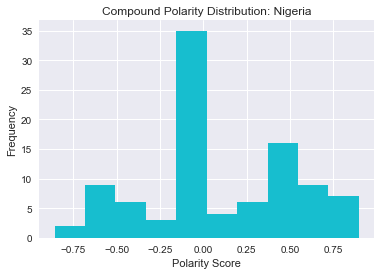

In [11]:
sns.set()
plt.hist(datas['compound'],bins=10,color='tab:cyan')
plt.title('Compound Polarity Distribution: ' +str(name))
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

## Step 5:  Conclusion

    After using a Lexicon we can gain a bit of insight and is best used for comparison of two different products. For example in our demonstration we compared Coca-Cola to Pepsi and saw that on average people tend to have a more positive view of Coca-Cola on Twitter. Feel free to use this and compare any two topics on Twitter, change the count of tweets or even implement a start and end date function. 
    There are many shortcomings to this approach as using a Lexicon makes it so each word is rated separately and it does not take into consideration words before or after. It is a simple score given to each word and then it takes the sum to create a score for the whole sentence. As people in our discussion pointed out, it does not account for sarcasm or Trends such as "Pepsi is More than Okay." We discussed that this could be improved by deep learning netwokrs as someone in the audience suggested.